# Problem Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

 

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

# Data
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

 

|Variable|Description|
|--------|:---------:|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

# Evaluation Metric:

Your model performance will be evaluated on the basis of your prediction of the sales for the test data (test.csv), which contains similar data-points as train except for the sales to be predicted. Your submission needs to be in the format as shown in "SampleSubmission.csv".

We at our end, have the actual sales for the test dataset, against which your predictions will be evaluated. We will use the Root Mean Square Error value to judge your response.


![title](RMSE.png)


Where,<br/>
N: total number of observations<br/>
Predicted: the response entered by user<br/>
Actual: actual values of sales

Also, note that the test data is further divided into Public (25%) and Private (75%) data. Your initial responses will be checked and scored on the Public data. But, the final rankings will be based on score on Private data set. Since this is a practice problem, we will keep declare winners after specific time intervals and refresh the competition.

## Solution/Approach
#### Steps
1. Reading csv/tsv etc file and then checking dimension,few rows to know little about data etc
2. Variable identification to know about <b>continuous or categorical in nature</b>
3. Univariate analysis<br/>
    A. Continuous Variables<br/>
    Tabular and graphical method is used to know about <b>mean,median,mode,missing values,Q1,Q3,skewness,outliers</b> etc
    
    B. Categorical Variables<br/>
    Tabular and graphical method is used to know about number of times each value occuring in that particular column<br/>
    <br/>
4. Bivariate analysis<br/>
    Tabular and graphical method is used to know about relation between continuous-continuous variables using            
    <b>correlation</b>,categorical-continuous variables using <b>t-test</b> and categorical-categorical variables using     
    <b>chi2_contingency</b> etc
5. Missing Values Treatment<br/>
    For continuous variables i am replacing missing values by zero,mean or median etc.It totally depends on type of values     
    present.<br/>
    For categorical variables i am replacing missing values by zero,mode etc.It totally depends on type of values present.
6. Outliers Treatment:<br/>
    Using <b>box plot</b>, i am able to find outliers then using <b>IQR</b> , i am replacing that outliers with mean,median or     mode.
7. Variable Transormation:<br/>
    According to <b>left or right skewness</b>, transforming variables by using log,square,cube etc to obtain <b>symmetrical         distrribution</b>
    
8. Modeling:<br/>
   a.Converting categorical variable into <b>dummies variables</b><br/>
   b.Separating indepedent and dependent variable from our data set<br/>
   c.Splitting these separated data into train and test data,must keeping <b>random_state=Numerical value</b><br/>
   d.Using LinearRegression object to fit the model on our train data<br/>
   e.Now Predicting the value for test data<br/>
   f.Finally checking the accuracy of our model.<br/>

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading csv files

train_data=pd.read_csv("train_reg_DA.csv")
test_data=pd.read_csv("test_reg_DA.csv")

In [3]:
train_original=train_data.copy()
test_original=test_data.copy()

In [4]:
# checking dimension 

print(train_data.shape)
print(test_data.shape)

(8523, 11)
(5681, 10)


In [5]:
# showing first five rows

train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ID
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FDA15OUT049
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRC01OUT018
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FDN15OUT049
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800,FDX07OUT010
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,NCD19OUT013


In [6]:
test_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,ID
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1,FDW58OUT049
1,8.300,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1,FDW14OUT017
2,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store,NCN55OUT010
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1,FDQ58OUT017
4,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3,FDY38OUT027


# Variables Identification

In [7]:
# checking continuous(int,float) and categorical(object,string) variables

train_data.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
ID                            object
dtype: object

# Univariate Analysis

## A.Continuous Variables

In [8]:
# return summary of only continuous variables
# From 'count' ,observe no. of missing value in each columns of continuous variable by comparing with number of rows
# in our csv file
# 25%,50% and 75% represent 1st,2nd(median) and 3rd Quartile respectively
# difference b/w max and min is known as Range
# difference b/w 3rd and 1st Quartile is known as Inter Quartile Range(IQR)

train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


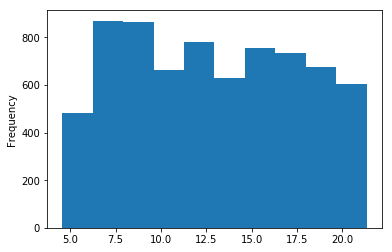

In [9]:
# symmetic distribution for this hist

train_data['Item_Weight'].plot.hist()

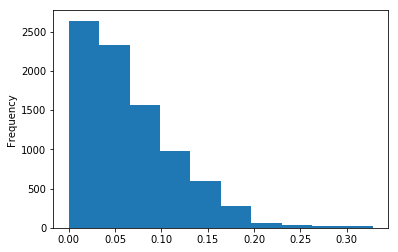

In [10]:
# right skewed
# later i will make it symmetric distributed by applying some transformation 

train_data['Item_Visibility'].plot.hist()

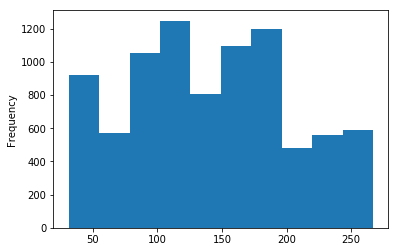

In [11]:
# symmetric distributed

train_data['Item_MRP'].plot.hist()

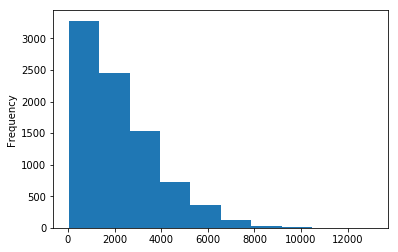

In [12]:
# right skewed
# later make,symmetric distributed

train_data['Item_Outlet_Sales'].plot.hist()

## B.Categorical Variables

In [13]:
# checking summary for each categorical variables
# returns number of times each values of particular columns appearing 

train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
# same like above step ,here returns in percentage
# Method 1:
train_data['Item_Fat_Content'].value_counts()/len(train_data['Item_Fat_Content'])

Low Fat    0.597090
Regular    0.338965
LF         0.037076
reg        0.013728
low fat    0.013141
Name: Item_Fat_Content, dtype: float64

In [15]:
# it also returns in percentage
# Method 2:
train_data['Item_Fat_Content'].value_counts(normalize=True)

Low Fat    0.597090
Regular    0.338965
LF         0.037076
reg        0.013728
low fat    0.013141
Name: Item_Fat_Content, dtype: float64

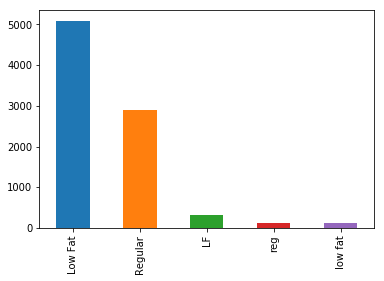

In [16]:
# now plotting to visualize it clearly

train_data['Item_Fat_Content'].value_counts().plot.bar()

Text(0.5,1,'Item_Fat_Content')
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Text(0.5,1,'Item_Type')
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Text(0.5,1,'Outlet_Size')
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Text(0.5,1,'Outlet_Type')
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


Text(0.5,1,'Outlet_Location_Type')
Tier 3    

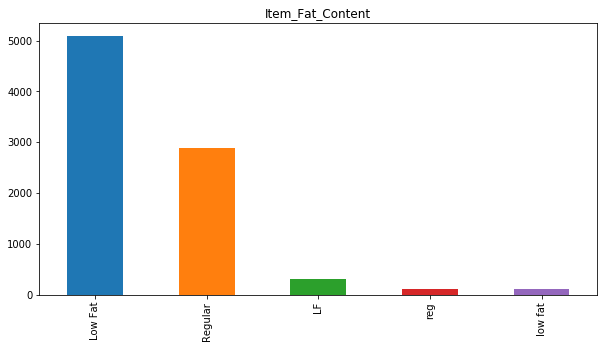

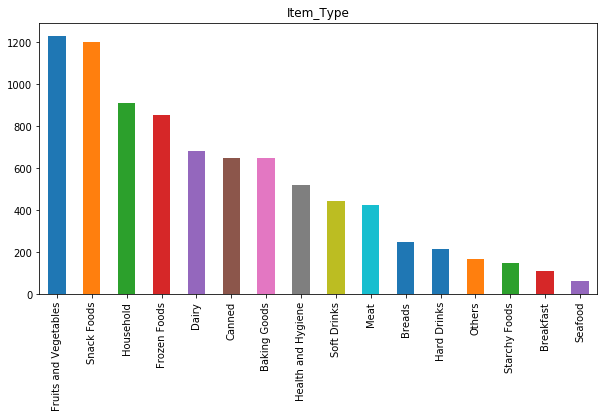

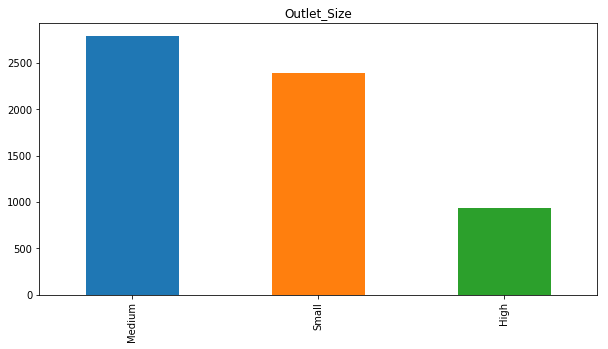

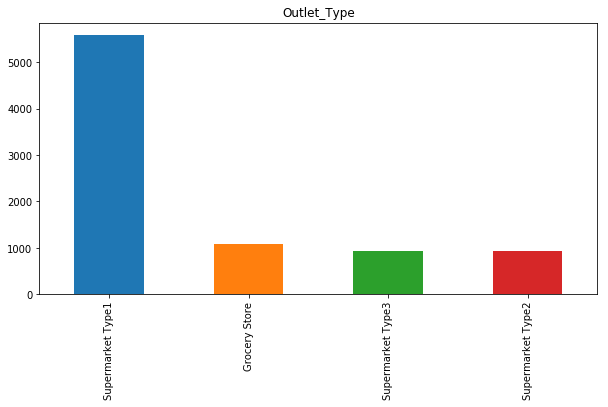

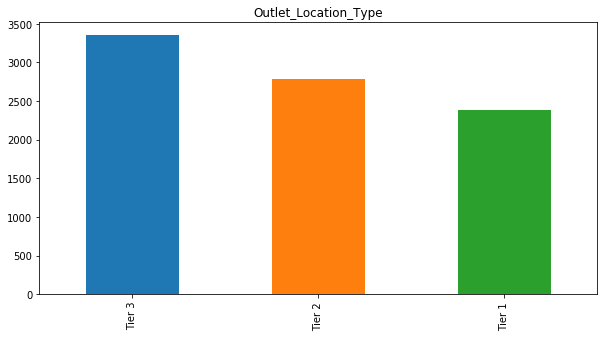

In [17]:
# doing every time same thing is time taken and boring
# plotting all graph using for loop

columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Type','Outlet_Location_Type']

for i in columns:
    print(plt.title(i))
    print(train_data[i].value_counts())
    print('\n')
    
for j in columns:
    train_data[j].value_counts().plot.bar(figsize=(10,5),title=j)
    plt.figure()
    

# Bivariate Analysis

## A.Continuous-Continuous variables

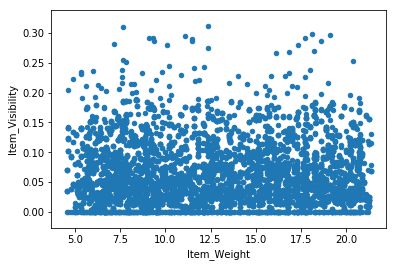

In [18]:
# plotting graph between two continuous variables and then analysing it

train_data.plot.scatter('Item_Weight','Item_Visibility')

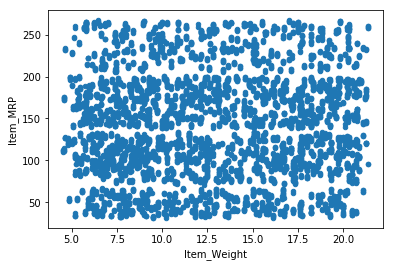

In [19]:
train_data.plot.scatter('Item_Weight','Item_MRP')

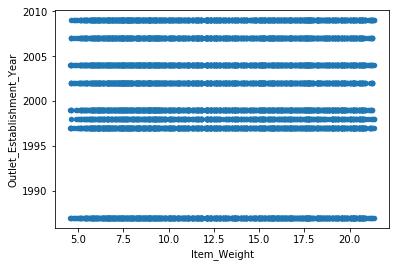

In [20]:
train_data.plot.scatter('Item_Weight','Outlet_Establishment_Year')

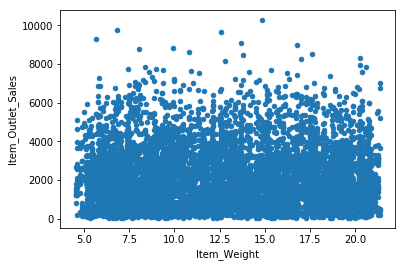

In [21]:
train_data.plot.scatter('Item_Weight','Item_Outlet_Sales')

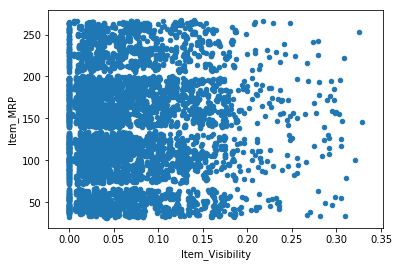

In [22]:
train_data.plot.scatter('Item_Visibility','Item_MRP')

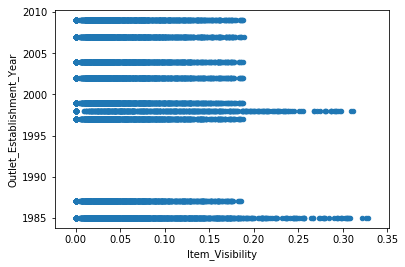

In [23]:
train_data.plot.scatter('Item_Visibility','Outlet_Establishment_Year')

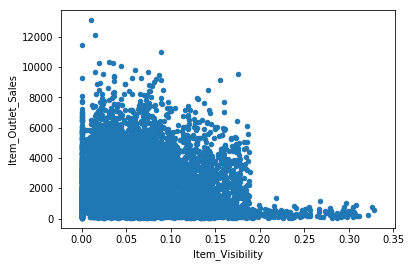

In [24]:
train_data.plot.scatter('Item_Visibility','Item_Outlet_Sales')

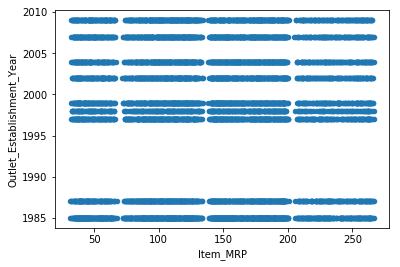

In [25]:
train_data.plot.scatter('Item_MRP','Outlet_Establishment_Year')

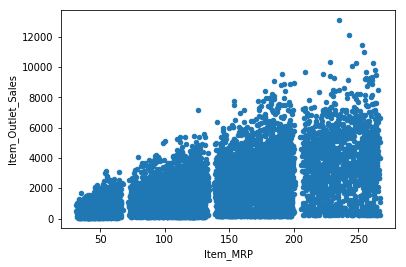

In [26]:
train_data.plot.scatter('Item_MRP','Item_Outlet_Sales')

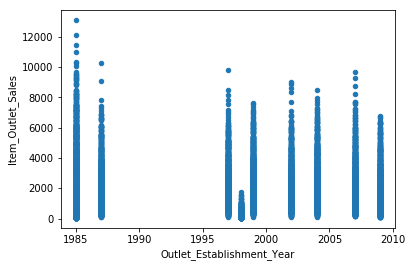

In [27]:
train_data.plot.scatter('Outlet_Establishment_Year','Item_Outlet_Sales')

In [28]:
# checking how one variable is related to another

train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


## B. Categorical-Continuous Variables

In [29]:
# grouping by Item_Fat_Content and then applying mean on Item_Weight

train_data.groupby('Item_Fat_Content')['Item_Weight'].mean()

Item_Fat_Content
LF         12.803212
Low Fat    12.953079
Regular    12.705840
low fat    12.563988
reg        12.842642
Name: Item_Weight, dtype: float64

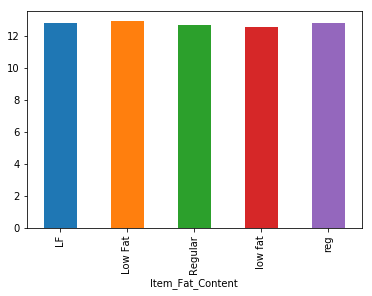

In [30]:
# plotting above step to visualize more clearly
# but we can't say about statistically difference

train_data.groupby('Item_Fat_Content')['Item_Weight'].mean().plot.bar()

In [31]:
train_data.groupby('Item_Fat_Content')['Item_MRP'].mean()

Item_Fat_Content
LF         138.788311
Low Fat    140.968921
Regular    141.714476
low fat    134.569043
reg        136.313513
Name: Item_MRP, dtype: float64

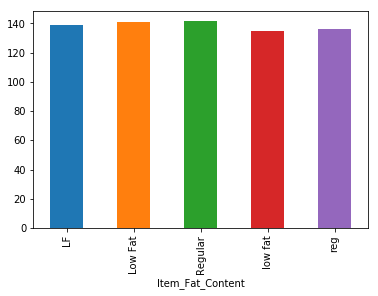

In [32]:
train_data.groupby('Item_Fat_Content')['Item_MRP'].mean().plot.bar()

In [33]:
train_data.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean()

Item_Fat_Content
LF         2073.551928
Low Fat    2164.477336
Regular    2235.186702
low fat    2087.740737
reg        1962.192268
Name: Item_Outlet_Sales, dtype: float64

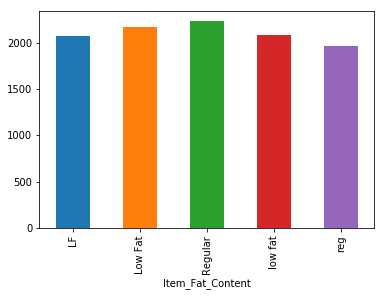

In [34]:
train_data.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().plot.bar()

In [35]:
train_data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean()

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

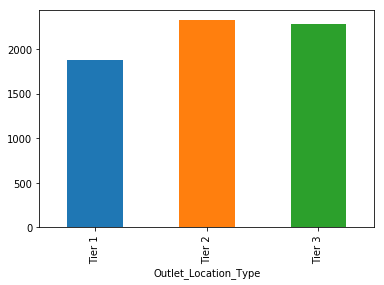

In [36]:
train_data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().plot.bar()

## C.Categorical-Categorical Variables

In [37]:
# see each row carefully

pd.crosstab(train_data['Outlet_Size'],train_data['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


In [38]:
from scipy.stats import chi2_contingency

# here p value=0.0 which is less than 0.05
chi2_contingency(pd.crosstab(train_data['Outlet_Size'],train_data['Outlet_Location_Type']))

(4095.431263490629,
 0.0,
 4,
 array([[ 364.07917553,  141.78962866,  426.13119581],
        [1091.06559791,  424.9124816 , 1277.0219205 ],
        [ 932.85522657,  363.29788974, 1091.84688369]]))

In [39]:
pd.crosstab(train_data['Outlet_Location_Type'],train_data['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
Tier 1,528,1860,0,0
Tier 2,0,2785,0,0
Tier 3,555,932,928,935


In [40]:
# again p value is less than 0.05 so both are statistically different

chi2_contingency(pd.crosstab(train_data['Outlet_Location_Type'],train_data['Outlet_Type']))

(4725.606588766826,
 0.0,
 6,
 array([[ 303.43822598, 1562.58078141,  260.00985568,  261.97113692],
        [ 353.88419571, 1822.35656459,  303.23594978,  305.52328992],
        [ 425.67757832, 2192.062654  ,  364.75419453,  367.50557315]]))

# Missing Values Treatment

In [41]:
# filling all missing(i.e NAN value) by zero

train_data.fillna(0,inplace=True)

In [42]:
test_data.fillna(0,inplace=True)

# Outlier Treatment

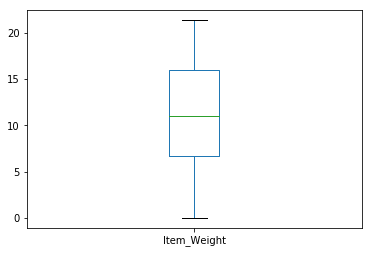

In [43]:
# no outliers in this case as there is no value below and above of Q1 and Q3 respectively
# symmetically distributed as Q2 is b/w Q1 and Q3 which i had already observed during univariate analysis

train_data['Item_Weight'].plot.box()

In [44]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.650590,0.066132,140.992782,1997.831867,2181.288914
std,6.431899,0.051598,62.275067,8.371760,1706.499616
min,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


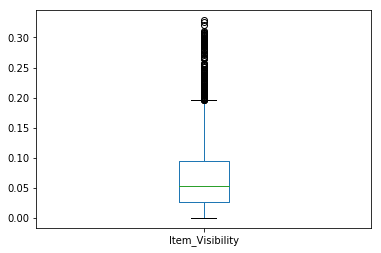

In [45]:
# outliers are present above Q3

train_data['Item_Visibility'].plot.box()

In [46]:
# calculating extreme value for ouliers removal( Q3+{Q3-Q1}*1.5 ) and replacing it with mean
# here i get value=0.195979, but all outliers are not removed by this value so i had taken 0.185979
# after running this step run once again previous step to see change in box plot

train_data.loc[train_data['Item_Visibility']>0.185979,'Item_Visibility']=np.mean(train_data['Item_Visibility'])


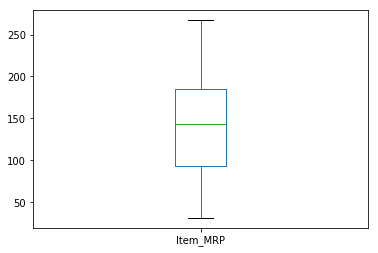

In [47]:
# little right skewed b'coz Q2 is little closer to Q3

train_data['Item_MRP'].plot.box()

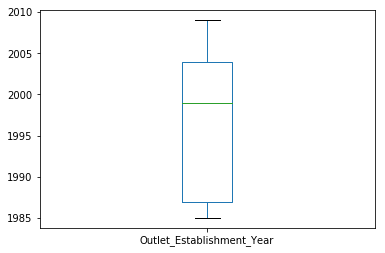

In [48]:
# right skewed b'coz Q2 is closer to Q3

train_data['Outlet_Establishment_Year'].plot.box()

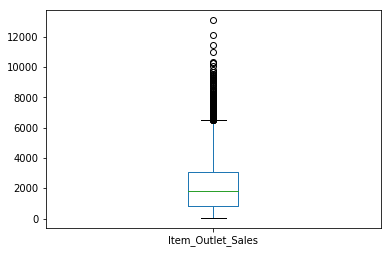

In [49]:
train_data['Item_Outlet_Sales'].plot.box()

In [50]:
# calculating extreme value for ouliers removal( Q3+{Q3-Q1}*1.5 ) and replacing it with mean
# here i get value=6501.8699, but all outliers are not removed by this value so i had taken 6001.8699
# after running this step run once again previous step to see change in box plot

train_data.loc[train_data['Item_Outlet_Sales']>6001.8699,'Item_Outlet_Sales']=np.mean(train_data['Item_Outlet_Sales'])

# Transforming variables

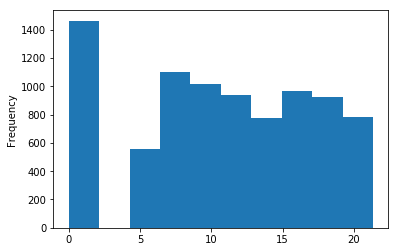

In [51]:
# still symmetic distributed

train_data['Item_Weight'].plot.hist()

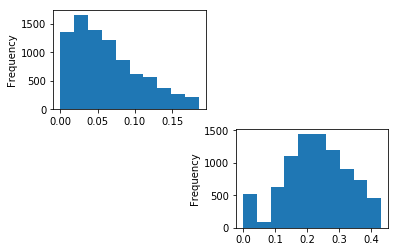

In [52]:
# right skewed(1st plot)
# symmetric (2nd plot)
plt.figure(1)

plt.subplot(221)
train_data['Item_Visibility'].plot.hist()

plt.subplot(224)
np.sqrt(train_data['Item_Visibility']).plot.hist()

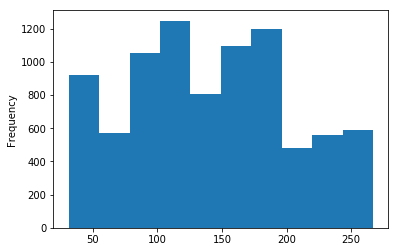

In [53]:
# symmetric

train_data['Item_MRP'].plot.hist()

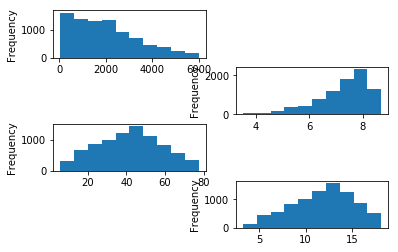

In [54]:
# 3rd graph is best for this because it is more symmetric

# if value of subplot is 221 you can plot 4 graph through it
# if value of subplot is 321 you can plot 6 graph through it
# if value of subplot is 421 you can plot 8 graph through it


#plt.figure(2)
plt.subplot(421)
train_data['Item_Outlet_Sales'].plot.hist()

plt.subplot(424)
np.log(train_data['Item_Outlet_Sales']).plot.hist()

plt.subplot(425)
np.sqrt(train_data['Item_Outlet_Sales']).plot.hist()

plt.subplot(428)
np.power(train_data['Item_Outlet_Sales'],1/3).plot.hist()


# Modeling

In [55]:
# dropping "ID" column from train_data

train=train_data.drop('ID',axis=1)
train.shape

(8523, 10)

In [56]:
# # dropping "ID" column from test_data

test=test_data.drop('ID',axis=1)
test.shape

(5681, 9)

In [57]:
# separating independent variables

x=train.drop('Item_Outlet_Sales',axis=1)
x.shape

(8523, 9)

In [58]:
# separating dependent variable

y=train['Item_Outlet_Sales']
y.shape

(8523,)

In [59]:
# converting categorical variables values into 0 and 1 using dummy variables

x=pd.get_dummies(x)
x.shape

(8523, 36)

In [60]:
test=pd.get_dummies(test)
test.shape

(5681, 36)

In [61]:
# splitting x and y into x_train,x_test,y_train,y_test

from sklearn.cross_validation import train_test_split

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5966, 36)
(2557, 36)
(5966,)
(2557,)


In [63]:
# importing LinearRegression for predicting purpose

from sklearn.linear_model import LinearRegression

In [64]:
# creating object

linreg=LinearRegression()

In [65]:
# fitting the model

linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
# predicting the value

pre=linreg.predict(x_test)

In [67]:
# checking the score 

linreg.score(x_test,y_test)

0.5136981266997807

In [68]:
linreg.score(x_train,y_train)

0.5155948547199675

In [69]:
# importing to perform RMSE
from sklearn.metrics import mean_squared_error

In [71]:
rmse_test = np.sqrt(mean_squared_error(y_test,pre))
rmse_train = np.sqrt(mean_squared_error(y_train,linreg.predict(x_train)))
print(rmse_test)
print(rmse_train)


979.9838349349386
989.5459277515578


In [72]:
# predicting on our actual data

predict_test=linreg.predict(test)

In [73]:
# reading submission file

submission=pd.read_csv("sample_submission_N6EApCa.csv")
submission.head()

,ID,Item_Outlet_Sales
0,FDW58OUT049,1000
1,FDW14OUT017,1000
2,NCN55OUT010,1000
3,FDQ58OUT017,1000
4,FDY38OUT027,1000


In [74]:
submission['Item_Outlet_Sales']=predict_test
submission['ID']=test_original['ID']

In [75]:
# converting our dataframe to csv

pd.DataFrame(submission, columns=['ID','Loan_Status']).to_csv('logistic.csv')